In [230]:
import numpy as np

## Set Parameter

In [231]:
x = np.array([-3, -2, -1, 0, 1, 2, 3])
print(x)
y = np.array([6, 3, 2, 3, 6, 11, 18])
print(y)
# z = np.array([1, 4, 3, 10, 7])
# print(z)

# f = np.array([50, 100, 105, 165, 150])
# print(f)

value = 1 
bias = np.full(len(x), value)
print(bias)

[-3 -2 -1  0  1  2  3]
[ 6  3  2  3  6 11 18]
[1 1 1 1 1 1 1]


## Set New column Stack

In [232]:
new_column_stack = np.column_stack((x**2, x, bias))

print(len(new_column_stack))

print(new_column_stack)

7
[[ 9 -3  1]
 [ 4 -2  1]
 [ 1 -1  1]
 [ 0  0  1]
 [ 1  1  1]
 [ 4  2  1]
 [ 9  3  1]]


## Func to cal parameter c

In [233]:
def cal_c_value(y):
    c = 1/len(y)*(sum(y**2))
    return c

## Func to cal parameter h

In [234]:
def cal_h_value(y,new_column_stack):
    a = 0
    h = 0
    for i in range(len(y)):
        a = a + y[i]*new_column_stack[i]
        
    h = (1/len(y))*a
        
    return h

## Func to cal parameter R

In [235]:
def cal_R_value(new_column_stack):
    a = np.zeros((len(new_column_stack[0]), len(new_column_stack[0])))  # Initialize a zero matrix of the correct size
    R = np.zeros((len(new_column_stack[0]), len(new_column_stack[0])))  # Initialize R as a zero matrix

    for i in range(len(new_column_stack)):
        a += np.outer(new_column_stack[i], new_column_stack[i])  # Compute the outer product and add it to 'a'
    
    R = (1/len(new_column_stack))*a
    
    return R

## Func to cal parameter a ... an

In [236]:
def cal_a_value(R, h):
    a = np.dot(np.linalg.inv(R), h)  # Matrix multiplication between R and h
    return a

In [237]:
c = np.round(cal_c_value(y), 2)
print(f"c : {c}")
# print(c)

h = np.round(cal_h_value(y, new_column_stack), 2)
print(f"h : {h}")
# print(h)

R = np.round(cal_R_value(new_column_stack), 2)
print("R :")
print(R)

a = np.round(cal_a_value(R, h), 2)
print("a :")
print(a)

c : 77.0
h : [40.  8.  7.]
R :
[[28.  0.  4.]
 [ 0.  4.  0.]
 [ 4.  0.  1.]]
a :
[1. 2. 3.]


## quadratic parameter

In [238]:
learning_rate = np.array([0.02])

a_test = np.array([0, 0, 0]) # a start parameter

quad_column_stack = np.column_stack((x, y)) # sort quadratic
print(quad_column_stack)

print(quad_column_stack[0])
print(new_column_stack[0])

[[-3  6]
 [-2  3]
 [-1  2]
 [ 0  3]
 [ 1  6]
 [ 2 11]
 [ 3 18]]
[-3  6]
[ 9 -3  1]


In [239]:
print(a_test)
print(new_column_stack[0])

e = y[0]- (np.dot(a_test, new_column_stack[0]))
print(e)

w11 = a_test + 2 * learning_rate * np.dot(e, new_column_stack[0])

print(w11)


[0 0 0]
[ 9 -3  1]
6
[ 2.16 -0.72  0.24]


In [240]:
for i in range(len(y)):
    print(f"---------- ITERATION {i+1} ----------")
    print(f"present : {quad_column_stack[i]}")
    e = np.round(y[i]- (np.dot(a_test, new_column_stack[i])), 2)
    print(f"when y {y[i]} :")
    print(f"y = {np.dot(a_test.T, new_column_stack[i])}")
    w = np.round(a_test + 2 * learning_rate * np.dot(e, new_column_stack[i]), 2)
    
    a_test = w
    
    
    print(f"error {i+1} (when y = {y[i]}): {e}")
    print(f"weight {i+1} : ")
    print(w)

---------- ITERATION 1 ----------
present : [-3  6]
when y 6 :
y = 0
error 1 (when y = 6): 6
weight 1 : 
[ 2.16 -0.72  0.24]
---------- ITERATION 2 ----------
present : [-2  3]
when y 3 :
y = 10.32
error 2 (when y = 3): -7.32
weight 2 : 
[ 0.99 -0.13 -0.05]
---------- ITERATION 3 ----------
present : [-1  2]
when y 2 :
y = 1.07
error 3 (when y = 2): 0.93
weight 3 : 
[ 1.03 -0.17 -0.01]
---------- ITERATION 4 ----------
present : [0 3]
when y 3 :
y = -0.01
error 4 (when y = 3): 3.01
weight 4 : 
[ 1.03 -0.17  0.11]
---------- ITERATION 5 ----------
present : [1 6]
when y 6 :
y = 0.97
error 5 (when y = 6): 5.03
weight 5 : 
[1.23 0.03 0.31]
---------- ITERATION 6 ----------
present : [ 2 11]
when y 11 :
y = 5.289999999999999
error 6 (when y = 11): 5.71
weight 6 : 
[2.14 0.49 0.54]
---------- ITERATION 7 ----------
present : [ 3 18]
when y 18 :
y = 21.27
error 7 (when y = 18): -3.27
weight 7 : 
[0.96 0.1  0.41]


## MPL 

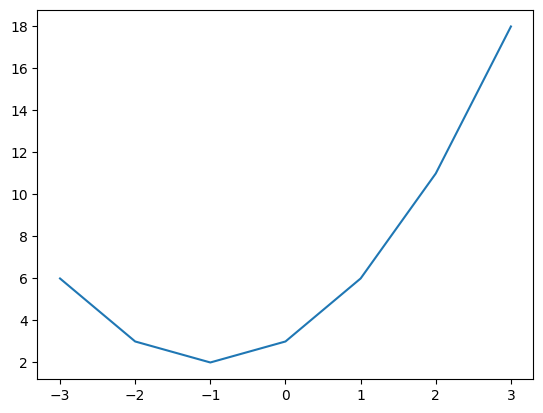

In [241]:
import matplotlib.pyplot as plt

plt.plot(x, y)

In [242]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

print(sigmoid(-1))

0.2689414213699951
